In [1]:
import numpy as np
from helpers import load_csv_data
from implementations import build_poly

# Create different datasets to test:

In [2]:
train_datapath = "../data/train.csv"
test_datapath = "../data/test.csv"
y_tr, x_tr, ids_tr = load_csv_data(train_datapath)
y_te, x_te, ids_te = load_csv_data(test_datapath)


In [3]:
def change_features(x_tr, x_te, threshold = 0, replace_with_mean = False, replace_with_zero = False):
        
    mask = (np.isnan(x_tr).sum(axis=0)/x_tr.shape[0] > threshold)
    x_te = x_te[:, ~mask]
    x_tr = x_tr[:, ~mask]
    if replace_with_mean:
        col_mean = np.nanmean(x_tr, axis = 0)
        nan_inds_tr = np.where(np.isnan(x_tr))
        nan_inds_te = np.where(np.isnan(x_te))
    
#         print("Before: \n")
#         print(x_tr[nan_inds_tr][:5], "\n")
#         print(x_te[nan_inds_te][:5], "\n")
        x_te[nan_inds_te] = np.take(col_mean, nan_inds_te[1])
        x_tr[nan_inds_tr] = np.take(col_mean, nan_inds_tr[1])
#         print("After: \n")
#         print(x_tr[nan_inds_tr][:5], "\n")
#         print(x_te[nan_inds_te][:5], "\n")
        
    if replace_with_zero:
        x_tr = np.nan_to_num(x_tr)
        x_te = np.nan_to_num(x_te)
        
        
        
    
    return x_tr, x_te

In [4]:
def combine(x_tr, x_te):
    array = np.ma.array(x_tr, mask=np.isnan(x_tr))
    corr = np.array(np.ma.corrcoef(array, rowvar=False, allow_masked=True))
    ind = np.argwhere(corr > 0.2)
    s = []
    result_tr = np.empty(x_tr.shape[0])
    result_te = np.empty(x_te.shape[0])

    for [i, j] in ind:
        if i != j:
            if (i, j) not in s:
                if (j, i) not in s:
                    s.append((i, j))
                    result_tr = np.c_[result_tr, x_tr[:, i] * x_tr[:, j]]
                    result_te = np.c_[result_te, x_te[:, i] * x_te[:, j]]
    return result_tr, result_te

In [6]:
def standardize_features(x_tr, x_te):
    # Skip first column
    mean_tr = np.mean(x_tr[:, 1:], axis=0)

    std_tr = np.std(x_tr[:, 1:], axis=0)
    x_tr[:, 1:] = (x_tr[:, 1:] - mean_tr) / std_tr
    x_te[:, 1:] = (x_te[:, 1:] - mean_tr) / std_tr

    return x_tr, x_te

In [ ]:
# count, mean, std, min, max

def stats(x):
    mask = (np.isnan(x_tr).sum(axis=0)/x_tr.shape[0] > threshold)
    x_te = x_te[:, ~mask]
    count = np.count_nonzero(~np.isnan(x), axis=0)
    mean = np.nanmean(x, axis=0)
    std = np.nanstd(x, axis =0)
    min_ = np.nanmin(x, axis =0)
    max_ = np.nanmax(x, axis=0)
    _25 = np.quantile(x, 0.25, axis=0)
    _50 = np.quantile(x, 0.5, axis=0)
    _75 = np.quantile(x, 0.75, axis=0)
    
    

In [3]:
import matplotlib.pyplot as plt
import itertools

def scatter_matrix(data):
    num_samples, num_features = data.shape
    print(num_samples, num_features)
#     fig, axes = plt.subplots(nrows = num_features, ncols = num_features, figsize = (10,10))
    fig1, axes1 = plt.subplots(nrows = 3, ncols=3, figsize= (10,10))
    
    fig1.subplots_adjust(hspace=0.05, wspace=0.05)
#     for ax in axes.flat:
#         ax.xaxis.set_visible(False)
#         ax.yaxis.set_visible(False)
    for i, j in zip(*np.triu_indices_from(axes1, k=1)):
        print(i,j)
        for x, y in [(i,j), (j,i)]:
#             print(x, y)
            print(data[:,x])
            print(data[:,y])
#             axes[x,y].plot(data[x], data[y])
            axes1[x,y].plot(data[:,x], data[:,y], 'bo')
    return fig1

## Dataset 0: Replace all -999 by NaN

In [14]:
x_tr[x_tr == -999] = np.nan
x_te[x_te == -999] = np.nan
nan_ind = np.where(np.isnan(x_tr).sum(axis=0)>0)
feat_perc_nan = np.isnan(x_tr).sum(axis=0)/x_tr.shape[0]
print("Features where NaNs exist: ", nan_ind)
print(feat_perc_nan[nan_ind])

Features where NaNs exist:  (array([ 0,  4,  5,  6, 12, 23, 24, 25, 26, 27, 28]),)
[ 0.152456  0.709828  0.709828  0.709828  0.709828  0.399652  0.399652
  0.399652  0.709828  0.709828  0.709828]


In [7]:
x_tr1, x_te1 = change_features(x_tr, x_te)

# Dataset 2: Replace all NaNs with mean
x_tr2, x_te2 = change_features(x_tr, x_te, threshold=1, replace_with_mean=True)

# Dataset 3: Replace all NaNs with zero
x_tr3, x_te3 = change_features(x_tr, x_te, threshold=1, replace_with_zero=True)

# Dataset 4: Remove all columns with >70% NaNs and replace the rest with mean
x_tr4, x_te4 = change_features(x_tr, x_te, threshold=0.7, replace_with_mean=True)

# Dataset 5: Remove all columns with >70% NaNs and replace the rest with zero
x_tr5, x_te5 = change_features(x_tr, x_te, threshold=0.7, replace_with_zero=True)

# print("Pre process: initial {}, after cleaning {}".format(x_tr.shape, x_tr2.shape))
# x_tr = x_tr5
# x_te = x_te5
# Dataset 6: Dataset 5 plus build_poly 7
x_tr6 = build_poly(x_tr5, 7)
x_te6 = build_poly(x_te5, 7)

x_tr7, x_te7 = combine(x_tr5, x_te5)

# build_poly and combinations
x_tr8 = np.c_[x_tr6, x_tr7]
x_te8 = np.c_[x_te6, x_te7]

In [ ]:
x_tr6[:,:1]

In [8]:
def feat_perc_nan(x_tr):
    nan_ind = np.where(np.isnan(x_tr).sum(axis=0)>0)
    feat = np.isnan(x_tr).sum(axis=0)/x_tr.shape[0]
    print("Features where NaNs exist: ", nan_ind)
    print(feat[nan_ind])

In [9]:
feat_perc_nan(x_tr8)

Features where NaNs exist:  (array([], dtype=int64),)
[]


250000 30
0 1
[ 138.47   160.937      nan ...,  105.457   94.951      nan]
[  51.655   68.768  162.172 ...,   60.526   19.362   72.756]
[  51.655   68.768  162.172 ...,   60.526   19.362   72.756]
[ 138.47   160.937      nan ...,  105.457   94.951      nan]
0 2
[ 138.47   160.937      nan ...,  105.457   94.951      nan]
[  97.827  103.235  125.953 ...,   75.839   68.812   70.831]
[  97.827  103.235  125.953 ...,   75.839   68.812   70.831]
[ 138.47   160.937      nan ...,  105.457   94.951      nan]
1 2
[  51.655   68.768  162.172 ...,   60.526   19.362   72.756]
[  97.827  103.235  125.953 ...,   75.839   68.812   70.831]
[  97.827  103.235  125.953 ...,   75.839   68.812   70.831]
[  51.655   68.768  162.172 ...,   60.526   19.362   72.756]


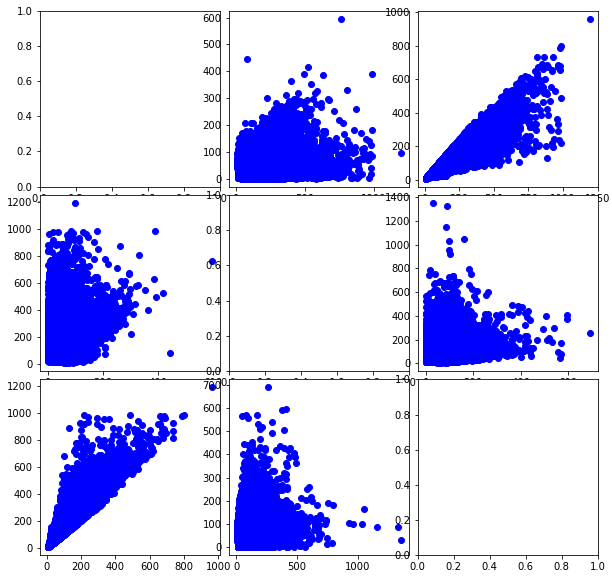

In [5]:
scatter_matrix(x_tr)

In [ ]:
np.mean(np.corrcoef(x_tr, rowvar=False))

In [8]:
array = np.ma.array(x_tr, mask=np.isnan(x_tr))
corr = np.array(np.ma.corrcoef(array, rowvar=False, allow_masked=True))
ind = np.where(corr>0.2)
ind[0].shape

(178,)

In [10]:
corr

array([[  1.00000000e+00,   2.21151781e-01,   9.11795114e-01,
          2.37434962e-02,  -2.71928282e-02,  -2.14648771e-02,
          1.83605519e-02,   4.97405129e-01,   1.35839319e-02,
          1.24621034e-01,   7.05026279e-02,   2.03164342e-02,
         -3.37360807e-02,   2.65951010e-01,   2.59403567e-03,
         -3.09053337e-03,   3.41073328e-01,   3.53846448e-03,
         -3.21624762e-03,   1.00092667e-01,  -8.14647378e-05,
          8.84472252e-02,   1.52054956e-02,   6.69384000e-03,
          2.45372439e-03,   6.57689739e-03,  -1.59990115e-02,
          4.97101768e-03,  -1.94162532e-03,   1.10930564e-02],
       [  2.21151781e-01,   1.00000000e+00,   1.90109488e-01,
         -2.49115929e-01,  -1.34006524e-01,  -1.32298243e-01,
          1.23520131e-01,   4.32514093e-02,   1.77575270e-02,
         -1.46836679e-01,   3.49503614e-01,  -4.19757335e-01,
         -1.09205865e-01,  -1.45464145e-01,  -2.10917148e-03,
          1.13208392e-03,   3.10647518e-01,  -6.77706784e-03,
       

In [92]:
row, col = np.where(corr>0.2)
s = set()



i in row:
    for j in col:
        if i != j:
            if ((i,j) not in s) or ((j,i) not in s):
                s.add((i,j))
                x_tr = np.c_[x_tr, (x_tr[:,i]*x_tr[:,j])]
                
x_tr.shape

KeyboardInterrupt: 

## Dataset 1: Remove all columns with any NaNs

In [60]:
x_tr1, x_te1 = change_features(x_tr, x_te)
x_tr1, x_te1 = standardize_features(x_tr1, x_te1)

Before: 

[ nan  nan  nan  nan  nan] 

[ nan  nan  nan  nan  nan] 

After: 

[  1.21858528e+02   8.48221045e+01  -3.27458741e-03  -1.23928255e-02
   8.48221045e+01] 

[  1.21858528e+02   8.48221045e+01  -3.27458741e-03  -1.23928255e-02
   8.48221045e+01] 



## Dataset 2: Replace all NaNs with mean

In [ ]:
x_tr2, x_te2 = change_features(x_tr, x_te, threshold = 1, replace_with_mean = True)
x_tr2, x_te2 = standardize_features(x_tr2, x_te2)

## Dataset 3: Replace all NaNs with zero

In [ ]:
x_tr3, x_te3 = change_features(x_tr, x_te, threshold = 1, replace_with_zero = True)
x_tr3, x_te3 = standardize_features(x_tr2, x_te2)

## Dataset 4: Remove all columns with >70% Nans and replace the rest with mean

In [ ]:
x_tr4, x_te4 = change_features(x_tr, x_te, threshold = 0.7, replace_with_mean = True)
x_tr4, x_te4 = standardize_features(x_tr2, x_te2)

## Dataset 5: Remove all columns with >70% Nans and replace the rest with zero

In [ ]:
x_tr5, x_te5 = change_features(x_tr, x_te, threshold = 0.7, replace_with_zero = True)
x_tr5, x_te5 = standardize_features(x_tr2, x_te2)

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
def PCA(x_tr, x_te):
    # Calculate feature means of x_tr
    mean = np.mean(x_tr, axis=0)
    
    # Center features by subtracting column means
    c = x_tr - mean
    
    # Calculate covariance matrix of centered matrix
    
    v = np.cov(c.T)
    
    # eigendecomposition of covariance matrix
    values, vectors = np.linalg.eig(v)
    print(values)
    print(len(values))
    print(vectors.shape)
    print(vectors)
    # project data
    p = vectors.T.dot(c.T)
    print(p.T.shape)
    
    
    tot = sum(values)
    var_exp = [(i/tot)*100 for i in sorted(values, reverse = True)]
    cum_var_exp = np.cumsum(var_exp)
    
    trace1 = Bar(x = ['PC %s' %i for i in range(1,len(values)+1)],
                y = var_exp,
                showlegend=False)
    trace2 = Scatter(x = ['PC %s'%i for i in range(1, len(values)+1)],
                    y=cum_var_exp,
                    name = 'cumulative explained variance')
    data = Data([trace1, trace2])
    layout = Layout(yaxis=YAxis(title='Explained variance in percent'),
                   title = 'Explained variance by different principal components')
    fig = Figure(data=data,layout=layout)
    py.iplot(fig)
    
PCA(x_tr2,x_te2)